# Zadanie 1

In [3]:
# !pip install matplotlib --upgrade
# !pip install pandas --upgrade

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

#### Wczytuję dane

In [4]:
df = pd.read_csv("zbior_danych.csv", sep=';')
df

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


#### Zobaczmy jak wyglądają nasze dane

In [5]:

print(f"Dane zawierają {df.shape[1]} kolumn i {df.shape[0]} wierszy.")
print("Braki w danych:")
print(df.isnull().sum())

Dane zawierają 11 kolumn i 310 wierszy.
Braki w danych:
id              0
waga            0
wzrost          0
plec            0
dzieci          0
wiek            0
dochod          0
oszczednosci    0
jednoos         0
miejsce         0
wydatki_zyw     0
dtype: int64


#### Dane zawierają 310 obserwacji i nie zawierają braków. Zmiennymi jakościowymi są kolumny: "plec", "jednoos" i "miejsce", natomiast reszta kolumn to zmienne ilościowe, a więc są 3 zmienne jakościowe i 8 zmiennych ilościowych.


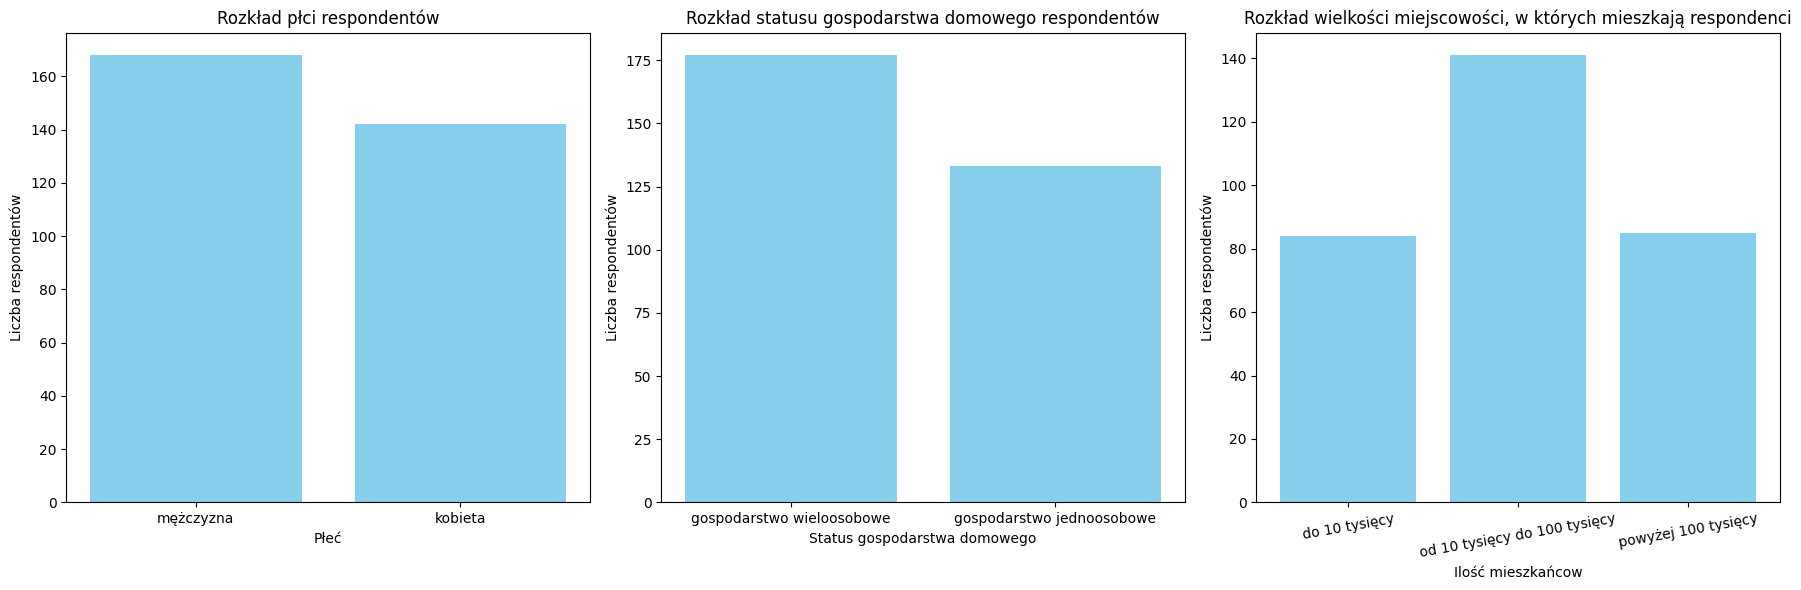

In [6]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
counts = df.plec.value_counts()
labels = ['mężczyzna', 'kobieta']
plt.bar(labels, counts, color='skyblue')
plt.title('Rozkład płci respondentów')
plt.xlabel('Płeć')
plt.ylabel('Liczba respondentów')

plt.subplot(1, 3, 2)
counts = df.jednoos.value_counts().sort_index()
labels = ['gospodarstwo wieloosobowe', 'gospodarstwo jednoosobowe']
plt.bar(labels, counts, color='skyblue')
plt.title('Rozkład statusu gospodarstwa domowego respondentów')
plt.xlabel('Status gospodarstwa domowego')
plt.ylabel('Liczba respondentów')

plt.subplot(1, 3, 3)
counts = df.miejsce.value_counts().sort_index()
labels = ['do 10 tysięcy', 'od 10 tysięcy do 100 tysięcy', 'powyżej 100 tysięcy']
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Ilość mieszkańcow')
plt.title('Rozkład wielkości miejscowości, w których mieszkają respondenci')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

#### W powyższych tabelach widzimy, że w badanej populacji jest nieco więcej mężczyzn niż kobiet, także gospodarstwa wieloosobowe są powszechniejsze od jednoosobowych i więcej mieszkańców zamieszkuje miasta o liczebności mieszkańców od 10 tyś. do 100 tyś., niż o mniejszej i większej liczebności, a te natomiast mają podobną liczebność populacji.

In [7]:
quantitative_variables = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']
df[quantitative_variables].describe()

,waga,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,79.814742,172.726774,2.003226,56.241935,1519.658000,945.994839,12.383097
std,3.292902,6.906733,1.352209,6.746653,1293.464325,787.601212,3232.382607
min,68.890000,155.670000,0.000000,37.000000,645.270000,-204.240000,-55640.190000
25%,77.430000,167.090000,1.000000,52.000000,966.807500,392.545000,199.757500
50%,79.890000,172.815000,2.000000,56.000000,1190.840000,741.190000,249.265000
75%,82.112500,178.032500,3.000000,61.000000,1620.460000,1270.222500,283.267500
max,86.730000,190.790000,5.000000,77.000000,17412.240000,5485.220000,301.690000


Analiza statystyczna ujawnia, że średnie wartości dla większości zmiennych, takich jak waga, wzrost, liczba dzieci, wiek, dochody i oszczędności, są zbliżone do ich median, co może wskazywać na ich symetryczne rozkłady. Wyjątek stanowią wydatki na życie, gdzie obserwowana jest znaczna różnica między średnią a medianą oraz niezwykle wysokie odchylenie standardowe, co sugeruje obecność wartości odstających. Również dochody wykazują dużą zmienność, co manifestuje się w dużym odstępie między trzecim kwartylem a maksymalną wartością dochodu.

In [8]:
df = df.loc[df['wydatki_zyw'] >= 0]
df[quantitative_variables].describe()

,waga,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,79.819309,172.805757,1.990132,56.259868,1389.315724,887.975954,235.571151
std,3.303614,6.935242,1.341112,6.782444,660.781113,668.759849,57.232769
min,68.890000,155.670000,0.000000,37.000000,645.270000,-204.240000,56.270000
25%,77.415000,167.130000,1.000000,51.750000,965.830000,384.657500,204.207500
50%,79.895000,172.890000,2.000000,56.500000,1181.350000,722.325000,250.465000
75%,82.142500,178.117500,3.000000,61.000000,1613.947500,1236.880000,284.110000
max,86.730000,190.790000,5.000000,77.000000,4780.150000,3390.590000,301.690000


Po usunięciu obserwacji z ujemnymi wydatkami na żywność, znacząco poprawiła się jakość analizy statystycznej. Średnia wartość wydatków na żywność zbliżyła się do mediany, co poprawiło symetrię rozkładu. Dodatkowo, maksymalne wartości zarówno dochodów, jak i oszczędności uległy zmniejszeniu, co zmniejszyło ich odchylenie standardowe. Zmiany te świadczą o większej spójności i wiarygodności analizowanych danych.

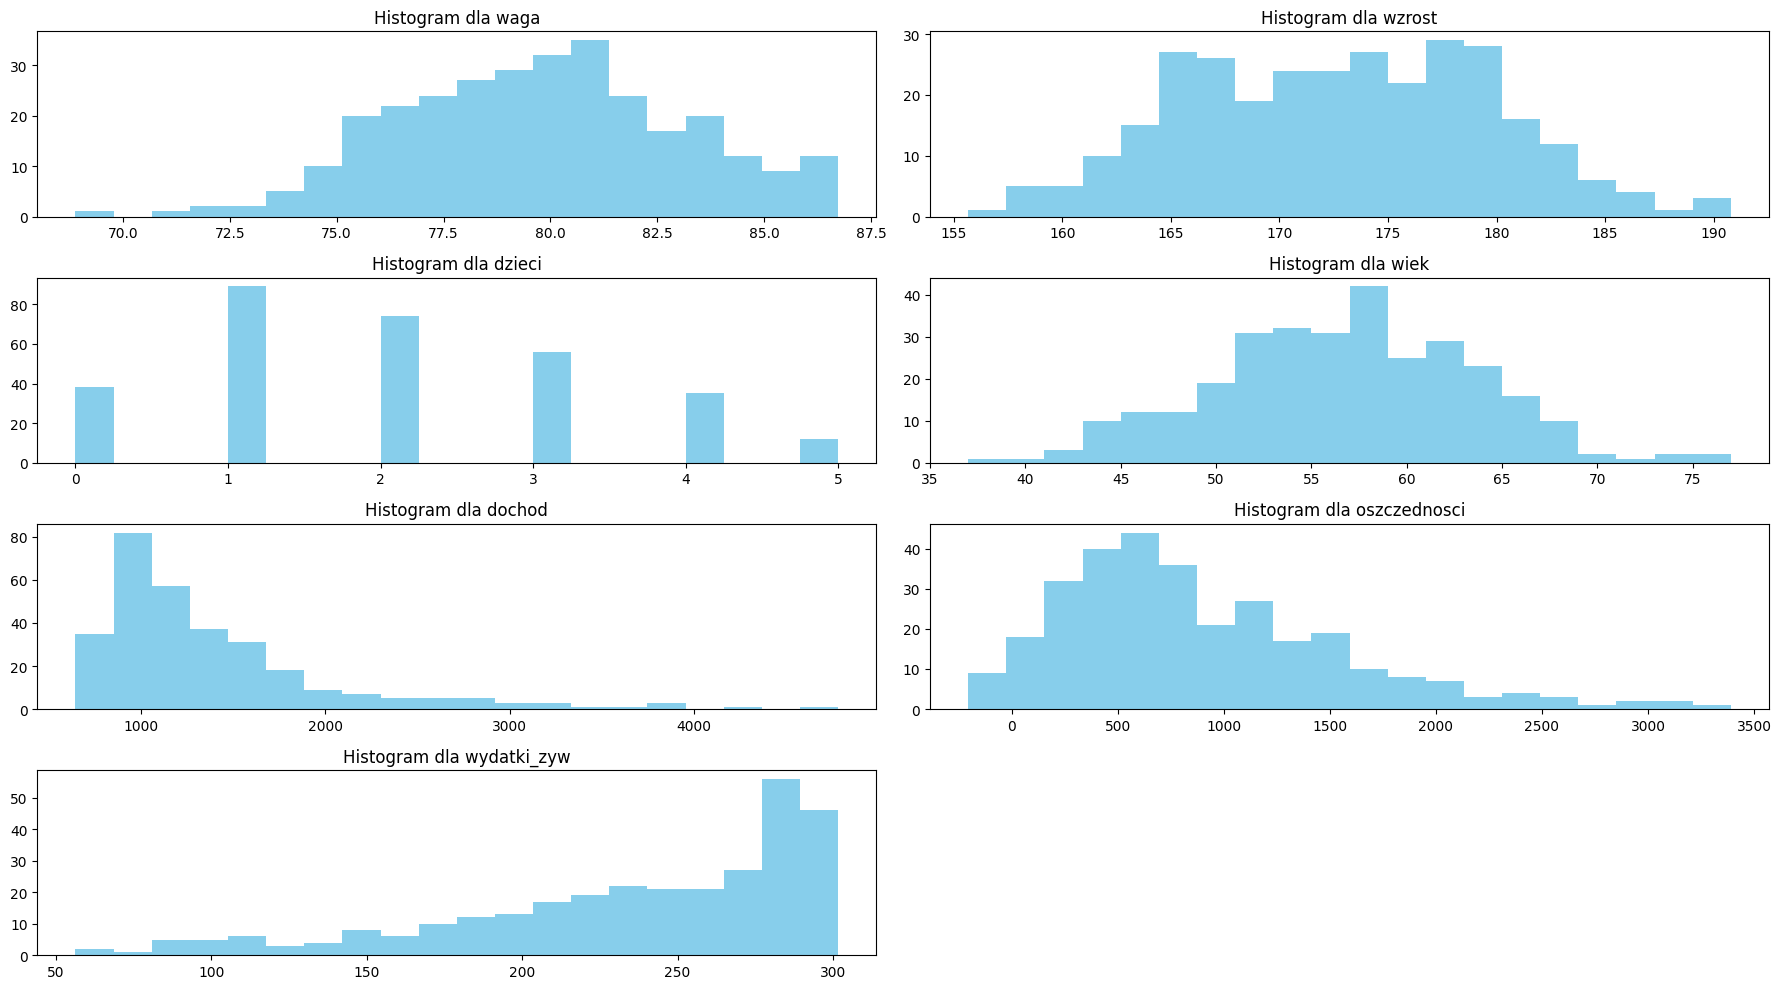

In [9]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(quantitative_variables):
  axes[i].hist(df[col], bins=20, color='skyblue')
  axes[i].set_title(f'Histogram dla {col}')

plt.tight_layout()

if len(quantitative_variables) < len(axes):
    axes[len(quantitative_variables)].axis('off')

plt.show()

W rozkładzie **masy ciała** respondentów widzimy tendencję do lewostronnej skośności, z większością danych skupionych w wyższym zakresie wartości, co wskazuje na lekką asymetrię rozkładu.

W rozkładach **wzrostu** i **wieku** w porównaniu do masy ciała widzimy większą symetrię, gdzie większość danych skupia się wokół średniej wartości, co wskazuje, że rozkłady wzrostu i wieku mogą być zbliżone do normalnego.

W rozkładzie **ilości potomstwa**, widzimy charakterystyczny widok, gdzie większość populacji skupia się w niższych wartościach, a tendecja to posiadania większej ilości potomstwa spada.
Rozkład **dochodów** jest wyraźnie skośny w prawo, co wskazuje na to, że mała część populacji zarabia znacznie więcej niż przeciętnie.

W rozkładzie posiadanych **oszczędności** podobnie widzimy prawostronną skośność, gdzie wyższw wartości są rzadsze, ale nie tak ekstremalnie jak w przypadku dochodów.

W rozkładzie **wydatków na żywność**, obserwujemy skupienia danych, szczególnie w przedziale wokół 250 jednostek. Takie skupienie może wskazywać na popularne, stałe wydatki wielu osób na żywność, które mogą wynikać z typowych kosztów bieżących, jak cotygodniowe zakupy.

Wzrost liczby obserwacji ze szczytem szczytem w około 275-300 jednostek może wskazywać na różne grupy konsumentów, z których jedna część wydaje znacząco więcej na żywność regularnie.

Spójrzmy teraz na wykresy Q-Q naszych zmiennych.

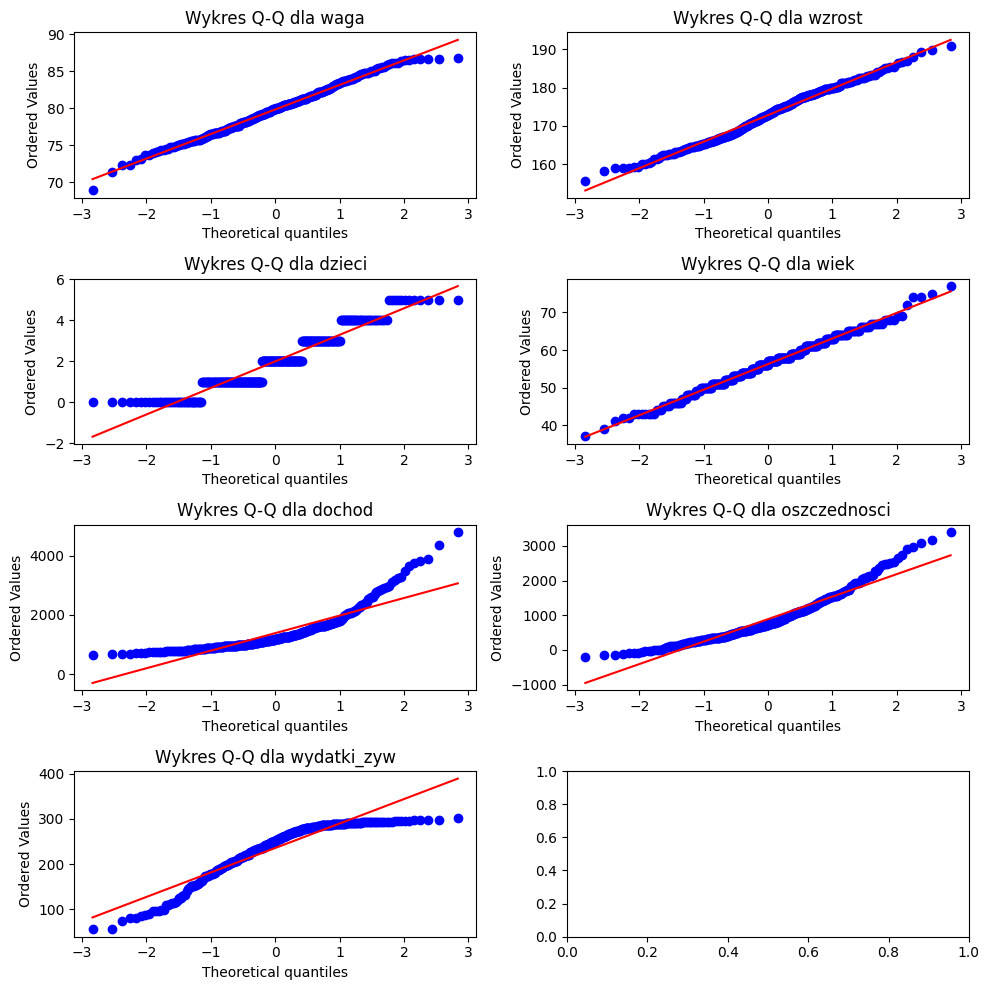

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

for axis, variable in zip(axes.flatten(), quantitative_variables):
  stats.probplot(df[variable], dist='norm', plot=axis)
  axis.set_title(f'Wykres Q-Q dla {variable}')

plt.tight_layout()

if len(quantitative_variables) < len(axes):
    axes[len(quantitative_variables)].axis('off')

plt.show()

Wykresy dla wagi, wzrostu i wieku są zbiegają się w linią reprezentującą rozkład normalny co świadczy o tym, że mają rozkład zbliżony do normalnego, natomiast wykresy dla dochodu, oszczędności i wydatków na żywność znacznie odbiegają od prostej co świadczy o tym, że ich rozkład odbiega od normalnego.

# Zadanie 2

Wykorzystując współczynnik korelacji Pearsona, sprawdzę czy istnieje zależność między naszymi zmiennymi ilościowymi.

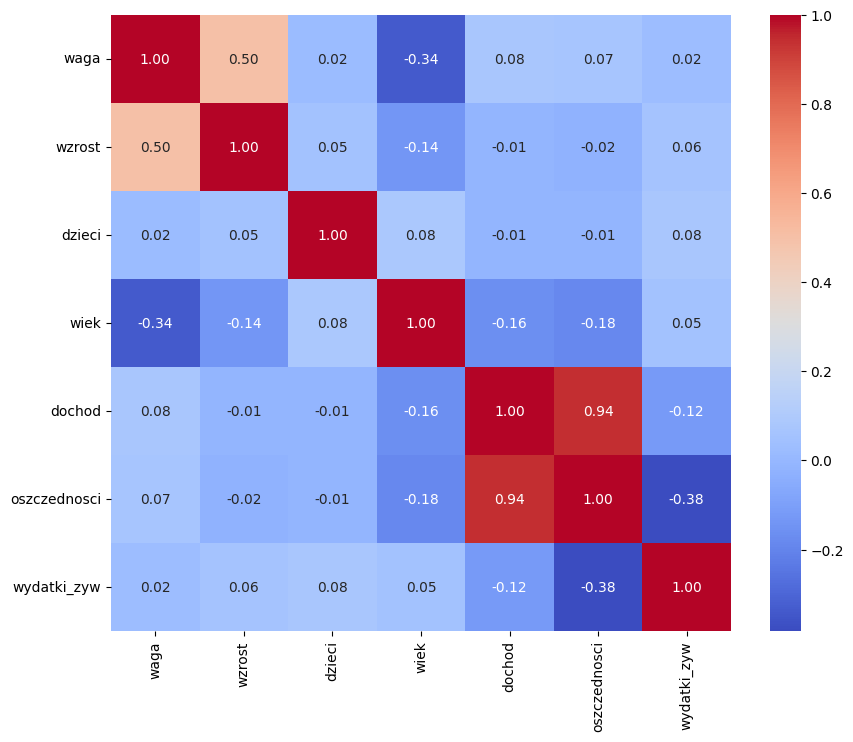

In [11]:
correlation_matrix = df[quantitative_variables].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

**Wzrost** i **waga** mają współczynnik korelacji 0.5, co wskazuje na umiarkowanie silną dodatnią korelację, co znaczy, że osoby wyższe mogą mieć tendencję do większej wagi, co jest zgodne z oczekiwaniami.

**Dochód** i **oszczędności** mają współczynnik korelacji 0.84, co wskazuje na silną dodatnią korelację. To również jest wydaje się być intuicyjne, gdyż większy dochód może się przyczyniać do większych oszczędności.

**Dochód** i **wydatki** na żywność mają współczynnik korelacji -0.76, co wskazuje na silną ujemna korelację, co jest raczej zaskakujące, gdyż sugeruje to, że wyższe dochody mogą być związane z niższymi wydatkami na życie.

Reszta par zmiennych wykazuje niskie współczynniki korelacji (bliskie 0), co wskazuje na brak liniowej zależności miedzy nimi.

Wykorzystując test Chi-kwadrat sprawdzimy, czy istnieje jakaś zależność między zmiennymi jakościowymi.

In [12]:
pairs = [('plec', 'miejsce'), ('plec', 'jednoos'), ('miejsce', 'jednoos')]

results = {'Variable Pair':[], 'Chi2':[], 'p-value':[], 'DoF':[], 'Expected':[]}
for var1, var2 in pairs:
  cross_table = pd.crosstab(df[var1], df[var2])
  chi2, p, dof, exp = stats.chi2_contingency(cross_table)
  results['Variable Pair'].append(f'{var1}_{var2}')
  results['Chi2'].append(chi2)
  results['p-value'].append(p)
  results['DoF'].append(dof)
  results['Expected'].append(exp)

qualitative_correlations = pd.DataFrame(results)
qualitative_correlations


,Variable Pair,Chi2,p-value,DoF,Expected
0,plec_miejsce,2.997366,0.223424,2,"[[44.50328947368421, 73.99342105263158, 44.503..."
1,plec_jednoos,0.138412,0.709865,1,"[[94.90460526315789, 68.09539473684211], [82.0..."
2,miejsce_jednoos,0.523855,0.769567,2,"[[48.32565789473684, 34.67434210526316], [80.3..."


#### Wysokie wartości p-value we wszystkich trzech parach wskazują na brak statystycznie istotnej zależności między tymi parami.

# Zadanie 3

**Wykresy rozrzutu (scatter-plot) dla wszystkich zmiennych ilościowych względem zmiennej wydatki_zyw.**



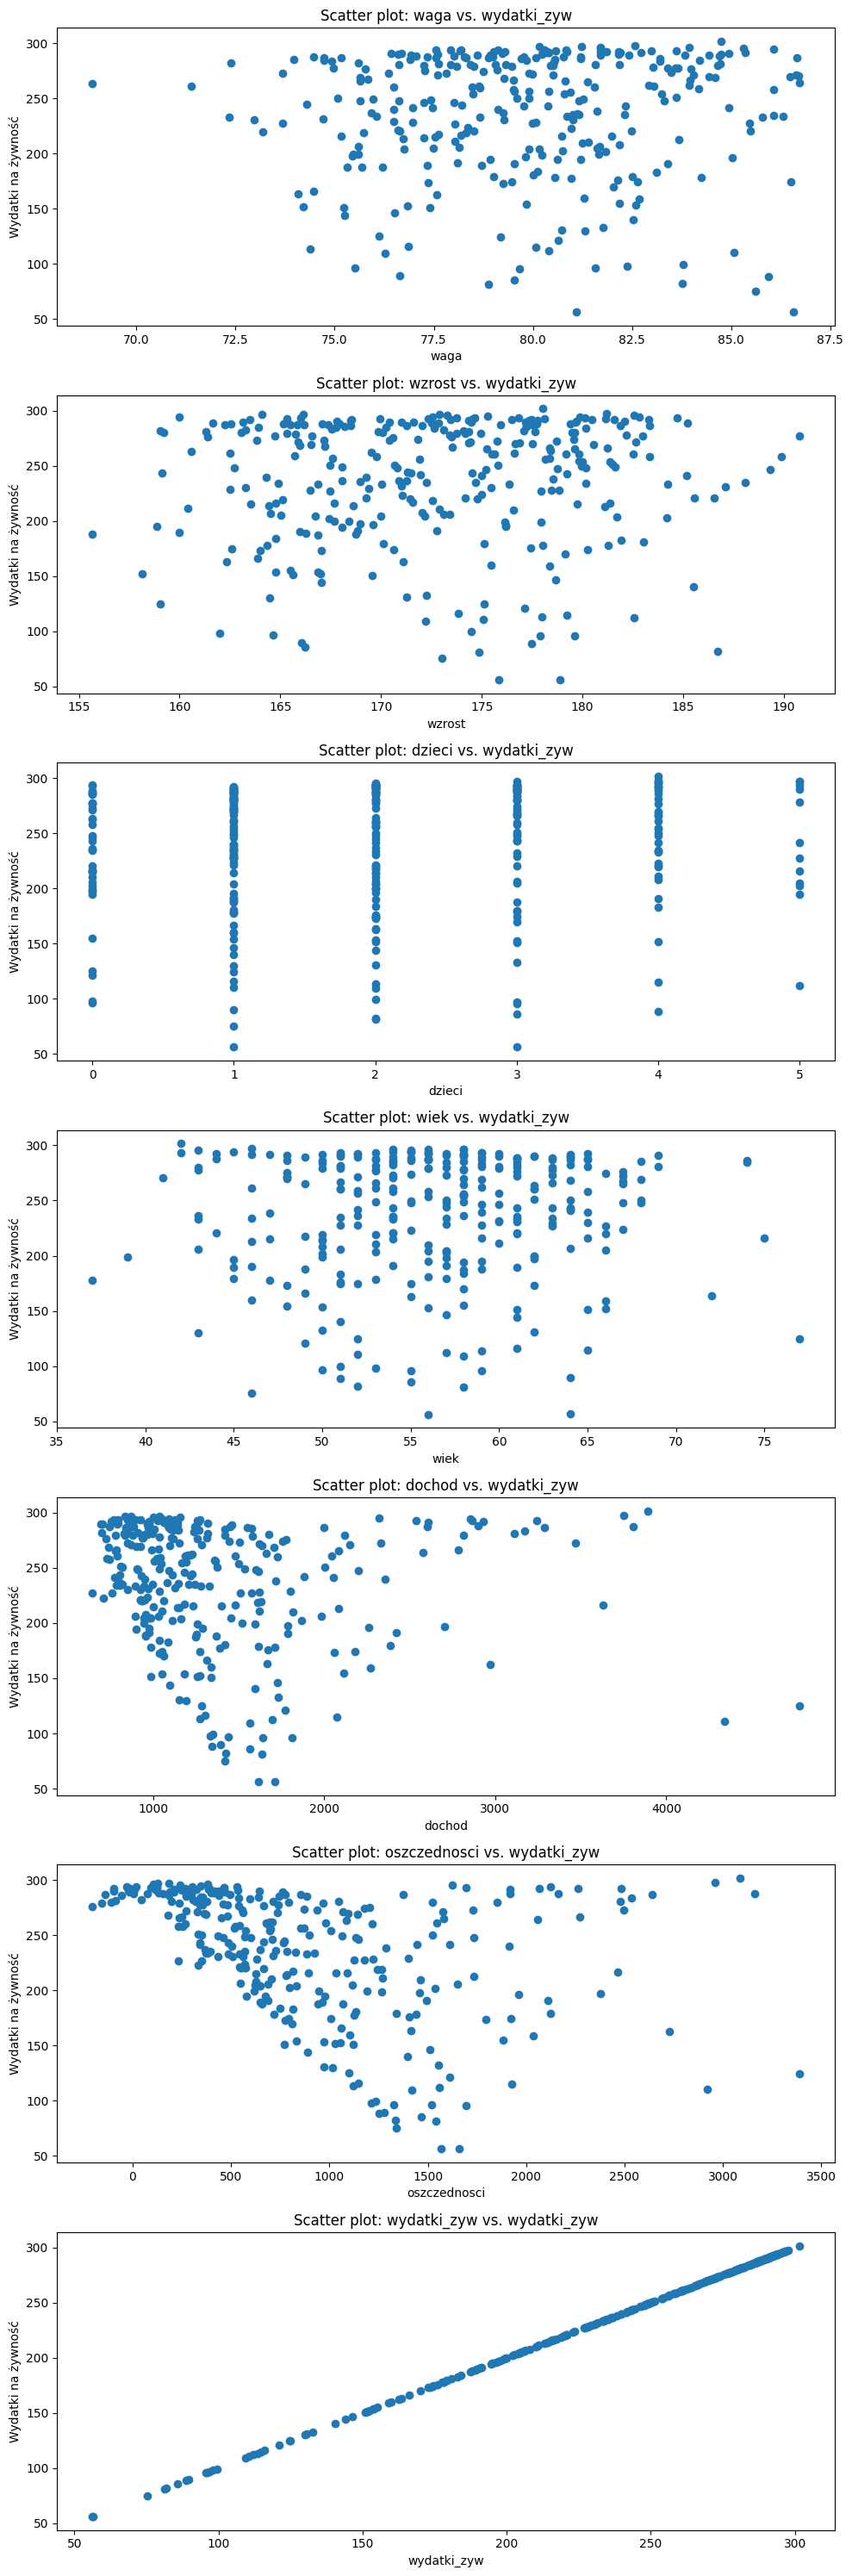

In [13]:
fig, axes = plt.subplots(len(quantitative_variables), 1, figsize=(10,30))

for i, variable in enumerate(quantitative_variables):
  axes[i].set_title(f'Scatter plot: {variable} vs. wydatki_zyw')
  axes[i].scatter(df[variable], df['wydatki_zyw'])
  axes[i].set_ylabel('Wydatki na żywność')
  axes[i].set_xlabel(variable)

plt.tight_layout()
plt.show()


Pewne trendy widać w przypadku wykresów dochodów i oszczędności vs. wydatki na żywność oraz ilości dzieci. Na wykresach dochodów i oszczędności widać, że osoby o niższych dochodach/oszczędnościach zbierają się w coraz wyższych szczeblach wydatków na żywność. W przypadu wykresu ilości dzieci, wykres wyraźnie pokazuje, że nie ma istotnej zależności między ilością dzieci a wydatkami na żywność, niemniej jednak można zauważyć, że zakres wydatków na życie jest wyżej położony dla większej liczby dzieci (4, 5). W reszcie wykresów nie widać wyraźnej korelacji, punkty są rozproszone, a ich rozmieszczenie nie sugeruje żadnej zależności.

**Wykresy typu pudełkowy (boxplot) dla dochodów w podziale na miejsce zamieszkania respondentów.**

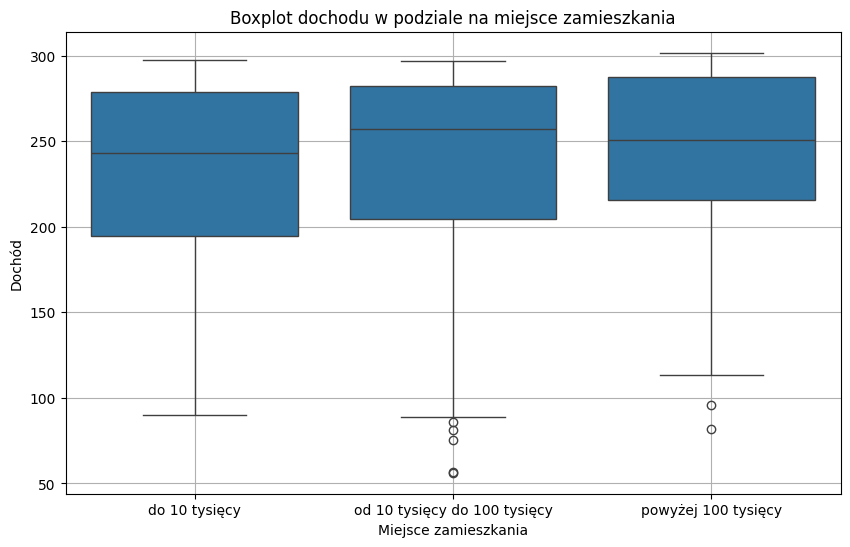

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='miejsce', y='wydatki_zyw', data=df, order=[1,2,3])
plt.title('Boxplot dochodu w podziale na miejsce zamieszkania')
plt.xlabel('Miejsce zamieszkania')
plt.ylabel('Dochód')
plt.xticks(ticks=[0,1,2], labels=labels)
plt.grid(True)
plt.show()

Z wykresu pudełkowego możemy wyczytać, że mediana wydatków na życie jest najwyższa w miastach o średniej wielkości, co może świadczyć o wyższym standardzie lub o wyższych kosztach życia, z drugiej strony rozpiętość wydatków jest też najszersza w przypadku miast o średniej wielkości, co może świadczyć o dużej różnorodności finansowej mieszkańców. Występowanie odstających wartości w średnich i dużych miastach wskazuje na istnienie wyjątkowo niskich wydatków na żywność w porównaniu do typowych wartości dla danej grupy. To może sugerować, że niektóre gospodarstwa domowe mają znacząco odmienne sytuacje finansowe od przeciętnych. W mniejszych miastach obserwujemy niższe położenie kwantyli w porównaniu z większymi miastami, co wskazuje na niższe koszty życia lub niższe standardy życia w mniejszych miastach.

**Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.**

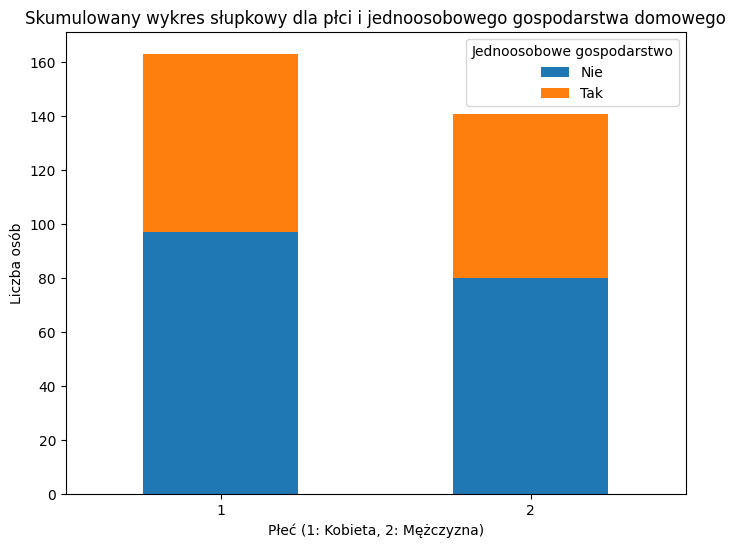

In [15]:
gender_household_cleaned = df.groupby(['plec', 'jednoos']).size().unstack()

gender_household_cleaned.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Skumulowany wykres słupkowy dla płci i jednoosobowego gospodarstwa domowego')
plt.xlabel('Płeć (1: Kobieta, 2: Mężczyzna)')
plt.ylabel('Liczba osób')
plt.xticks(rotation=0)
plt.legend(title='Jednoosobowe gospodarstwo', labels=['Nie', 'Tak'])
plt.show()

Z wykresów wynika, że większość osób w obu grupach nie prowadzi jednoosobowego gospodarstwa, a proporcje między tymi którzy prowadzą a tymi, którzy nie prowadzą jednoosobowego gospodarstwa jest podobny u kobiet i u mężczyzn, co sugeruje, że płeć nie ma dużego wpływu na tę decyzję.

**Wykres słupkowy pokazujący średnie wydatki na żywność w różnych grupach wiekowych**



<ipython-input-16-5ad12b1a0df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wiek_kategoria'] = pd.cut(df['wiek'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])


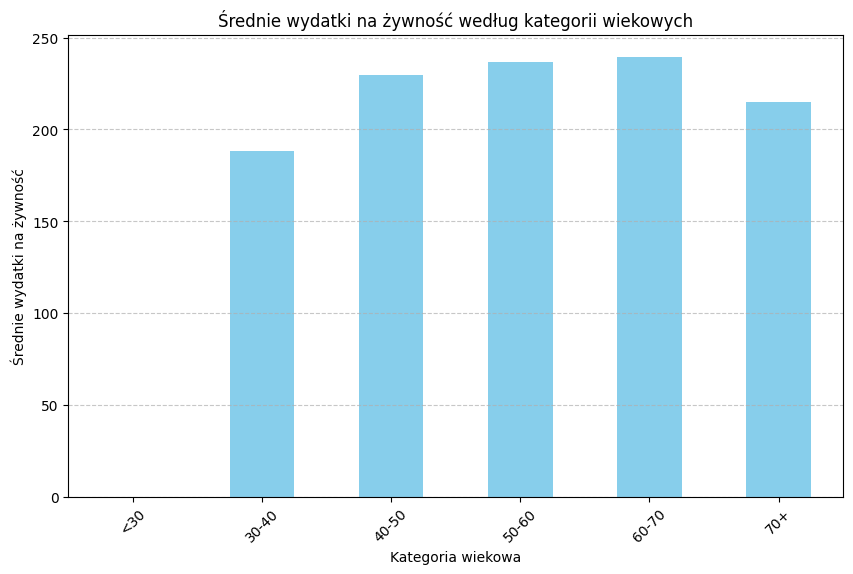

In [16]:
df['wiek_kategoria'] = pd.cut(df['wiek'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
mean_expenditures_by_age = df.groupby('wiek_kategoria')['wydatki_zyw'].mean()

# Tworzenie wykresu słupkowego ponownie
plt.figure(figsize=(10, 6))
mean_expenditures_by_age.plot(kind='bar', color='skyblue')
plt.title('Średnie wydatki na żywność według kategorii wiekowych')
plt.xlabel('Kategoria wiekowa')
plt.ylabel('Średnie wydatki na żywność')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najniższe wydatki na żywność występują w najmłodszej grupie wiekowej (30-40 lat), następnie wraz ze wzrostem wieku obserwujemy wzrost wydatków na jedzenie, aż do grupy 60-70 lat, gdzie obserwujemy najwyższe wydatki na żywność. Taka tendencja wzrostowa może wynikać na przykład z coraz większej stabilności finansowej w starszym wieku lub chęci odżywania się zdrowiej. Następnie w najstarszej grupie wiekowej obserwujemy znaczny spadek wydatków na żywność, może to wynikać na przykład z mniejszego zapotrzebowania kalorycznego u osób podeszłych.

# Zadanie 4

Założenia:



*   **Normalność rozkładu zmiennej wiek**: Poprzednio w zadaniu 1, wykres QQ dla wieku wykazał, że zmienna wiek ma rozkład zbliżony do normalnego.
*   **Niezależność próbek**: Zakładamy, że każda obserwacja dotycząca wieku jest niezależna od innych, co jest kluczowe dla prawidłowego zastosowania metod statystycznych.






In [17]:
age_data = df['wiek']

mean_age = np.mean(age_data)
std_age = np.std(age_data, ddof=1)
n = len(age_data)

alpha = 0.01
confidence_level = 1 - alpha

dof = n - 1

chi2_lower = stats.chi2.ppf(alpha/2, dof)
chi2_upper = stats.chi2.ppf(1 - alpha/2, dof)

confidence_interval_std = (np.sqrt((dof * std_age**2) / chi2_upper), np.sqrt((dof * std_age**2) / chi2_lower))

t_critical = stats.t.ppf(1 - alpha/2, n-1)

confidence_interval_mean = (mean_age - t_critical * (std_age / np.sqrt(n)), mean_age + t_critical * (std_age / np.sqrt(n)))

print(f'Przedziały ufności dla:\n' +
      f'- średniej - {confidence_interval_mean}\n' +
      f'- odchylenia standardowego - {confidence_interval_std}')

Przedziały ufności dla:
- średniej - (55.25152156054645, 57.26821528155881)
- odchylenia standardowego - (6.136394836972781, 7.568207600724594)


## przedzialy ufnosci kwantyle


In [18]:
df


,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw,wiek_kategoria
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96,50-60
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20,50-60
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41,50-60
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77,50-60
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
304,209,81.26,179.94,2,1,55,1535.14,1066.30,1,3,249.39,50-60
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83,60-70
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16,60-70
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36,50-60


## komentarz do tych przedzialow ufnosci

# Zadanie 5

W celu przeprowadzenia podziału obserwacji wyliczę na początku wartości 25-tego, 75-tego i 90-tego kwantyla.

In [19]:
quantile_25 = df['dochod'].quantile(0.25)
quantile_75 = df['dochod'].quantile(0.75)
quantile_90 = df['dochod'].quantile(0.9)
quantile_25, quantile_75, quantile_90

(965.83, 1613.9475, 2194.527)

Na podstawie tych wartości dokonam teraz podziału, dodając nową kolumnę "klasa_zamoznosci" i wyliczę średnią, odchylenie standardowe, liczbę obserwacji, medianę i współczynnik zmienności dla każdej z klas zamożności.

In [20]:
df['klasa_zamoznosci'] = pd.cut(
    df['dochod'],
    bins=[0, quantile_25, quantile_75, quantile_90, df.dochod.max()],
    labels=['klasa_nizsza', 'klasa_srednia', 'klasa_wyzsza_srednia', 'klasa_wyzsza']
)
wydatki_zyw_summary = df.groupby('klasa_zamoznosci')['wydatki_zyw'].agg(['mean', 'std', 'count', 'median'])
wydatki_zyw_summary['cv'] = wydatki_zyw_summary['std'] / wydatki_zyw_summary['mean']

wydatki_zyw_summary

<ipython-input-20-88668eb92664>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['klasa_zamoznosci'] = pd.cut(


,mean,std,count,median,cv
klasa_zamoznosci,,,,,
klasa_nizsza,258.610132,31.333049,76,268.700,0.121159
klasa_srednia,231.226645,59.344931,152,248.415,0.256653
klasa_wyzsza_srednia,201.490444,65.869815,45,211.160,0.326913
klasa_wyzsza,249.862581,56.083263,31,279.530,0.224456


**Klasa niższa**: średnia wydatków wynosi **258.61**, odchylenie standardowe wynosi **31.33**, natomiast współczynnik zmienności (cv) jest najniższy spośród klas zamożności i wynosi **0.12**.

**Klasa średnia**: średnia wydatków wynosi **231.22**, odchylenie standardowe wynosi **59.34**, a współczynnik zmienności jest wyższy niż w klasie niższej i wynosi **0.26**.

**Klasa wyższa średnia**: średnia wydatków wynosi **201.49**, odchylenie standardowe wynosi **65.86**, a współczynnik zmienności jest tutaj najwyższy spośród klas z wartością **0.33**.

**Klasa wyższa**: średnia wydatków wynosi **249.86**, odchylenie standardowe wynosi **56.08**. Współczynnik zmienności niższy niż w dwóch poprzednich grupach wynosi **0.22**.

**Komentarz**:

Zróżnicowanie wydatków na żywność różni się w zależności do klasy zamożności. W klasie wyższej średniej, gdzie dochody są wysokie, ale nie najwyższe, obserwujemy największe zróżnicowanie wydatków. Może to sugerować, że osoby z tej klasy mają bardziej zróżnicowane preferencje lub możliwości zakupowe w zakresie żywności. Klasa niższa, z najmniej zróżnicowanymi wydatkami, może mieć bardziej ograniczone możliwości wyboru, co prowadzi do bardziej jednorodnych wzorców wydatków.

# Zadanie 6

**Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyzni?**

W celu odpowiedzenia na pytanie badawcze pt. "Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyzni?", jakoże rozkład zmiennej oszczednosci wcześniej na wykresie QQ zdecydowanie odbiegał od normalnego, skorzystam z testu U Manna-Whitneya, który nie zakłada normalności zmiennych, by stwierdzić, czy rozkłady tych zmiennych się różnią.

H0: Rozkłady dwóch grup są takie same.

H1: Rozkłady dwóch grup różnią się.

In [21]:
women_savings = df[df['plec'] == 1]['oszczednosci']
men_savings = df[df['plec'] == 2]['oszczednosci']

u_stat, p_value = stats.mannwhitneyu(women_savings, men_savings, alternative='two-sided')
print("U-statistic:", u_stat, "P-value:", p_value)

U-statistic: 11708.0 P-value: 0.7774740323422892


Wynik testu U Manna-Whitneya (p-value = 0.777) wskazuje, że nie ma statystycznie istotnej różnicy w oszczędnościach między kobietami a mężczyznami na poziomie istotności α = 0,01. To oznacza, że nie możemy stwierdzić, iż kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni w badanej próbce.



**Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?**

Aby zbadać, czy istnieje korelacja pomiędzy proporcją wydatków na żywność względem dochodu a wysokością oszczędności, najpierw obliczę wspomnianą proporcję, a następnie jakoże rozkłady tych zmiennych odbiegają od normalnego, zastosuję test korelacji Spearmana.

H0: Nie istnieje monotoniczny związek między dwiema zmiennymi.

H1: Istnieje monotoniczny związek między zmiennymi.

In [22]:
df['proporcja_wydatki_dochod'] = df['wydatki_zyw'] / df['dochod']

spearman_corr = stats.spearmanr(df['proporcja_wydatki_dochod'], df['oszczednosci'])

spearman_corr

<ipython-input-22-323ceeaa6496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proporcja_wydatki_dochod'] = df['wydatki_zyw'] / df['dochod']


SignificanceResult(statistic=-0.9726091116445553, pvalue=2.0103756749114015e-193)

Wynik testu korelacji Spearmana wskazuje na bardzo silną i statystycznie istotną ujemną zależność między proporcją wydatków na żywność względem dochodu a oszczędnościami:

r = -0.97, p-value < 0.01



**Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?**

Aby ocenić czy średnia waga kobiet w próbie jest wyższa niż 56 kg, na początku sprawdzę czy rozkład masy ciała kobiet przyjmuje rozkład normalny, by móc stwierdzić, z którego testu mogę skorzystać.

In [23]:
women_weights = df[df['plec'] == 1]['waga']

shapiro_women_weight = stats.shapiro(women_weights)
shapiro_women_weight

ShapiroResult(statistic=0.9934977293014526, pvalue=0.6817423105239868)

Wyniki testu Shapiro, wskazują na to, że waga kobiet przyjmuje rozkład normalny, a więc skorzystam z testu t-Studenta dla jednej próby, który służy do porównania średniej z wartością teoretyczną.

H0: średnia waga kobiet = 56 kg

H1: średnia waga kobiet > 56 kg

In [24]:
t_stat, p_value = stats.ttest_1samp(women_weights, 56)

p_value_one_sided = p_value / 2

t_stat, p_value_one_sided

(107.0286338796581, 1.5711163348632539e-152)

Wynik testu t-studenta dla średniej wagi kobiet wynosi
t=107.03, a jednostronne p-value jest znacznie mniejsze od poziomu istotności α=0.01. Oznacza to, że możemy odrzucić hipotezę zerową i przyjąć, że średnia waga kobiet w próbie jest wyższa niż 56 kg.

**Czy zmienna wzrost przyjmuje rozkład normalny?**

Aby sprawdzić, czy rozkład zmiennej wzrost jest zbliżony do normalnego, skorzystam z testu Shapiro-Wilka.

H0: Zmienna przyjmuje rozkład normalny

H1: Rozkład zmiennej odbiega od normalnego

In [25]:
heights = df['wzrost']

shapiro_height = stats.shapiro(heights)

shapiro_height

ShapiroResult(statistic=0.989259660243988, pvalue=0.02431187406182289)

Wynik testu Shapiro dla wzrostu wynosi 0.99, a p-value jest wyższe od poziom istotności α=0.01, a więc nie możemy odrzucić hipotezy zerowej. Wysoka wartość statystyki testowej wskazuje na to, że rozkład zmiennej jest bardzo bliski normalnemu.

# Zadanie 7

In [26]:
import statsmodels.api as sm

df = pd.get_dummies(df, columns=['plec', 'jednoos', 'miejsce'], drop_first=True, dtype=np.uint8)

additional_columns = ['klasa_zamoznosci', 'proporcja_wydatki_dochod', 'wiek_kategoria']
df.drop(columns=additional_columns, inplace=True)

X_orig = df.drop(columns=['id', 'wydatki_zyw'])
X = X_orig
y = df['wydatki_zyw']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.51e-66
Time:                        15:06:29   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          226.2224     90.953      2.487      0.013      47.219     405.225
waga            -0.4266      0.755     -0.565      0.572      -1.912       1.059
wzrost          -0.0961      0.410     -0.235      0.815      -0.903       0.710
dzieci           3.1627      1.433      2.207      0.028       0.342       5.983
wiek            -0.4059      0.307     -1.324      0.186      -1.009       0.197
dochod           0.1878      0.009     21.572      0.000       0.171       0.205
oszczednosci    -0.2120      0.009    -22.336      0.000      -0.231      -0.193
plec_2           6.8792      6.148      1.119      0.264      -5.220      18.978
jednoos_1        7.2584      5.970      1.216      0.225      -4.492      19.009
miejsce_2       -5.4212      4.655     -1.164      0.245     -14.584       3.741
miejsce_3        0.5035      5.200      0.097      0.923      -9.730      10.737
==============================================================================
Omnibus:                      223.700   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3842.367
Skew:                          -2.805   Prob(JB):                         0.00
Kurtosis:                      19.489   Cond. No.                     9.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared**: 0.679

Ten współczynnik mówi, że około 67.9% zmienności zmiennej zależnej (wydatki na żywność) jest wyjaśnione przez model. To jest stosunkowo wysoki wynik, sugerujący, że model dobrze pasuje do danych.

**Test łącznej istotności**: F-statistic: 61.90, Prob (F-statistic): 2.51e-66

Bliska zeru wartość p-value świadczy o tym, że model jest statystycznie znaczący, co znaczy, że przynajmniej jedna z predykcyjnych zmiennych w modelu ma istotny wpływ na zmienną zależną.

**Testy indywidualnej istotności zmiennych**

Zmienna dochod i oszczednosci mają bardzo niskie wartości p (p < 0.001), co oznacza, że te zmienne mają statystycznie istotny wpływ na wydatki na żywność. Dochód zwiększa wydatki, podczas gdy oszczędności je zmniejszają.
Zmienna dzieci również jest istotna (p = 0.028), sugerując, że liczba dzieci na utrzymaniu dodatnio wpływa na wydatki.
Inne zmienne, takie jak wiek, waga, wzrost oraz zmienne kategoryczne (plec_2, jednoos_1, miejsce_2, miejsce_3), nie wykazują statystycznej istotności, co sugeruje, że te zmienne nie mają indywidualnego wpływu na wydatki na żywność w modelu.

## Założenia KMRL

**Liniowość formy funkcyjnej**
Użyjemy wykresów reszt w stosunku do przewidywanych wartości oraz zmiennych niezależnych, aby sprawdzić, czy są jakieś nieliniowe wzory.

Text(0, 0.5, 'Residuals')

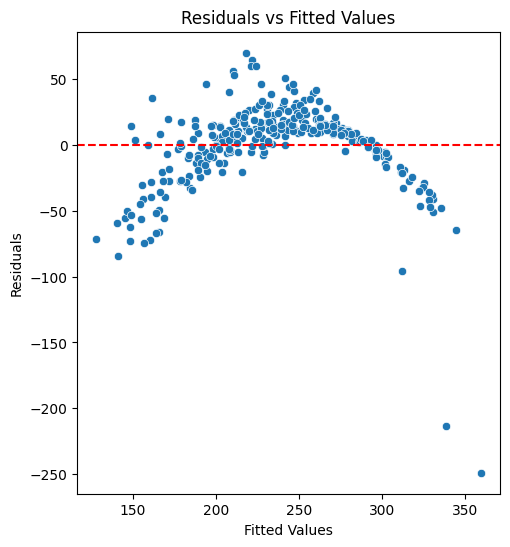

In [27]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


Reszty wykazują nieliniowy wzór w zależności od wartości dopasowanych. Reszty mają tendencję do tworzenia krzywej, co może oznaczać, że w modelu powinny być rozważone nieliniowe transformacje zmiennych lub użycie modelu nieliniowego.

**Homoskedastyczność**
Na wykresie reszt do wartości dopasowanych można zauważyć hetereskadystyczność danych. By potwierdzić obserwacje przeprowadzę Test Breusch-Pagan na homoskedastyczność.


In [28]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)

bp_test


(93.07850161136912,
 1.3105173207129154e-15,
 12.929929466877505,
 1.0621790695356787e-18)

Statystyka: 93.08, p-value: ~0

Test wskazuje, że mamy do czynienia z heteroskadystycznością.

**Brak autokorelacji**
Skorzystam z testu Durbin-Watson do oceny autokorelacji.

In [29]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)

dw_stat

2.100799118162562

Statystyka: 2.101

Wartości w okolicy 2 sugerują brak autokorelacji, co jest pozytywne dla modelu.

**Normalność składnika losowego** Skorzystam z testu Shapiro-Wilka do oceny normalności składnika losowego.

In [30]:
shapiro_test = stats.shapiro(residuals)

shapiro_test

ShapiroResult(statistic=0.8034005761146545, pvalue=6.820653191631295e-19)

Statystyka: 0.803, p-value: ~0

Test wykazuje, że rozkład reszt nie jest normalny, co zgadza się z wynikiem testu Omnibus.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3         dzieci     1.028401
4           wiek     1.203732
5         dochod     9.216374
6   oszczednosci    11.222733
7         plec_2     2.625501
8      jednoos_1     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


**dochod**: VIF wynosi 9.22, co wskazuje na umiarkowany problem wielowspółliniowości.

**oszczednosci**: VIF wynosi 11.22, co jest jeszcze bardziej wyraźnym sygnałem potencjalnego problemu wielowspółliniowości.

Pozostałe zmienne mają VIF poniżej 5, co zwykle jest uznawane za akceptowalne.

## Poprawa modelu V2

Dodaję zaproponowane transformowane zmienne: kwadrat dochodu, kwadrat oszczędności i iloczyn dochodu i oszczędności.

In [32]:
X['dochod^2'] = X.dochod**2
X['dochod*oszczednosci'] = X.dochod * X.oszczednosci
X['oszczednosci^2'] = X.oszczednosci**2

X

,const,waga,wzrost,dzieci,wiek,dochod,oszczednosci,plec_2,jednoos_1,miejsce_2,miejsce_3,dochod^2,dochod*oszczednosci,oszczednosci^2
0,1.0,78.93,176.20,5,59,979.01,673.17,1,0,0,1,9.584606e+05,6.590402e+05,4.531578e+05
1,1.0,78.66,165.73,3,52,1043.36,543.89,0,0,1,0,1.088600e+06,5.674731e+05,2.958163e+05
2,1.0,74.29,171.33,2,57,1227.69,773.20,0,0,0,0,1.507223e+06,9.492499e+05,5.978382e+05
3,1.0,79.11,169.24,1,59,2356.74,1914.74,0,1,1,0,5.554223e+06,4.512544e+06,3.666229e+06
4,1.0,79.23,177.78,1,48,1264.95,536.29,1,1,0,1,1.600099e+06,6.783800e+05,2.876070e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.0,81.26,179.94,1,55,1535.14,1066.30,1,1,0,1,2.356655e+06,1.636920e+06,1.136996e+06
305,1.0,77.59,170.41,3,62,1124.12,415.07,1,0,0,1,1.263646e+06,4.665885e+05,1.722831e+05
306,1.0,72.39,163.27,1,61,701.51,44.23,0,0,1,0,4.921163e+05,3.102779e+04,1.956293e+03
308,1.0,77.24,175.21,1,60,1182.43,710.35,1,0,0,1,1.398141e+06,8.399392e+05,5.045971e+05


In [33]:
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.534e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        15:06:30   Log-Likelihood:                -447.79
No. Observations:                 304   AIC:                             923.6
Df Residuals:                     290   BIC:                             975.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0652      3.069      0.347      0.729      -4.976       7.107
waga                    0.3634      0.025     14.634      0.000       0.315       0.412
wzrost                  0.0110      0.013      0.813      0.417      -0.016       0.037
dzieci                  1.5076      0.047     31.894      0.000       1.415       1.601
wiek                   -0.2488      0.010    -24.742      0.000      -0.269      -0.229
dochod                  0.6986      0.001    664.461      0.000       0.697       0.701
oszczednosci           -0.6988      0.001   -638.152      0.000      -0.701      -0.697
plec_2                 -0.1317      0.203     -0.647      0.518      -0.532       0.269
jednoos_1              -0.1871      0.241     -0.775      0.439      -0.662       0.288
miejsce_2               0.1127      0.153      0.737      0.462      -0.188       0.414
miejsce_3               0.1439      0.171      0.844      0.399      -0.192       0.479
dochod^2               -0.0004   9.43e-07   -476.039      0.000      -0.000      -0.000
dochod*oszczednosci     0.0009   2.03e-06    441.376      0.000       0.001       0.001
oszczednosci^2         -0.0004   1.07e-06   -420.903      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        0.603   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.448
Skew:                           0.087   Prob(JB):                        0.800
Kurtosis:                       3.070   Cond. No.                     2.52e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

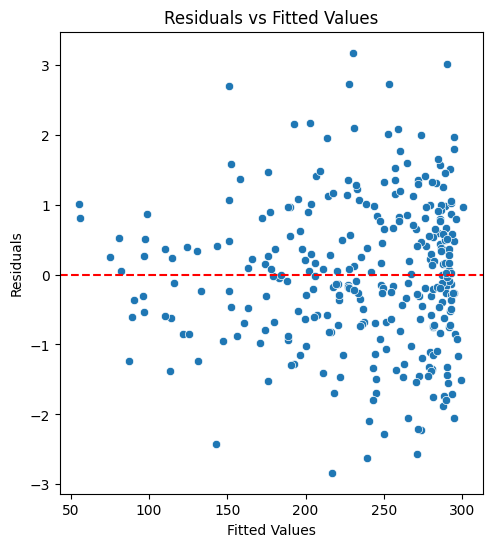

In [34]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Resztki rozkadają się po równo po ou stronach poprzecznej linii, co jest pozytywne dla modelu, a także znacznie zmniejszyliśmy rozstrzał resztek. Nieco więcej się ich zbiera w wyższym przedziale wartości dopasowanych, co może świadczyć o heteroskadystyczności.

In [35]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)
shapiro_test = stats.shapiro(residuals)
dw_stat = sm.stats.stattools.durbin_watson(residuals)

print(f'Breusch-pagan test: {bp_test}\n' +
      f'Shapiro test for residuals: {shapiro_test}\n' +
      f'Durbin Watson test for residuals: {dw_stat}')

Breusch-pagan test: (10.277223457788274, 0.6711228708623128, 0.780535787427402, 0.6806947898945969)
Shapiro test for residuals: ShapiroResult(statistic=0.9969993233680725, pvalue=0.8469101190567017)
Durbin Watson test for residuals: 1.8275791889276303


Wyniki testu Breuscha-Pagana (p-value >> 0.05) sugerują brak heteroskadystyczności, wynik testu Shapiro dla resztek wskazuje, że ich rozkład jest podobny do normalnego i wynik testu Durbina-Watsona jest bardzo zbliżony do 2, co świadczy o braku autokorrelacji.

Dzięki dodaniu transformowanych zmiennych udało się poprawić dwie z poprzednio niespełnionych założeń KMRL.

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.073e+05
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        15:21:02   Log-Likelihood:                -448.86
No. Observations:                 304   AIC:                             915.7
Df Residuals:                     295   BIC:                             949.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.3087    

Text(0, 0.5, 'Residuals')

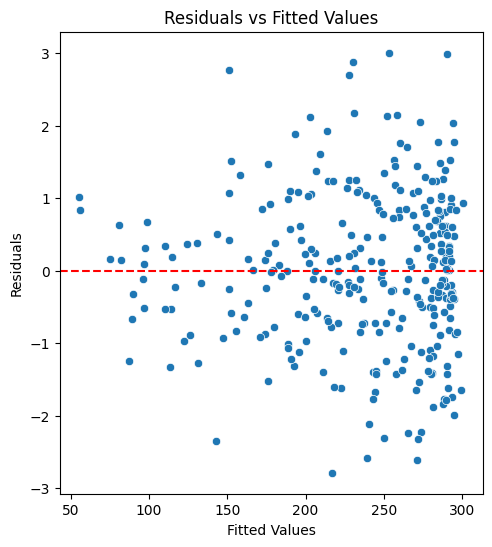

In [47]:
X_new = X.drop(columns=['wzrost', 'plec_2', 'jednoos_1', 'miejsce_2', 'miejsce_3'])
model = sm.OLS(y, X_new)
results = model.fit()

print(results.summary())

residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

## Przedziały ufności dla kwantyli

Poniżej przedstawiam, jak bym policzył przedziały ufności dla kwantyli.

In [ ]:
from scipy.stats import norm

def percentile_conf_interval(m, percentile, alfa):
    z_crit = norm.ppf(1 - alfa / 2)
    i = z_crit * np.sqrt(m * percentile * (1 - percentile))
    left = int(np.ceil(m * percentile - i))
    right = int(np.ceil(m * percentile + i)) - 1
    return left, right

confidence_level = 0.99
alfa = 1 - confidence_level
age_data_sorted = sorted(age_data)
age_data_len = len(age_data)

# 1st quantile
left_25, right_25 = percentile_conf_interval(age_data_len, 0.25, alfa)
# 2nd quantile
left_50, right_50 = percentile_conf_interval(age_data_len, 0.50, alfa)
# 3rd quantile
left_75, right_75 = percentile_conf_interval(age_data_len, 0.75, alfa)


print(f"Przedziały ufności dla 1 kwantyla: ({age_data_sorted[left_25]}, {age_data_sorted[right_25]})")
print(f"Przedziały ufności dla 2 kwantyla: ({age_data_sorted[left_50]}, {age_data_sorted[right_50]})")
print(f"Przedziały ufności dla 3 kwantyla: ({age_data_sorted[left_75]}, {age_data_sorted[right_75]})")



Przedziały ufności dla 1 kwantyla: (50, 53)
Przedziały ufności dla 2 kwantyla: (55, 58)
Przedziały ufności dla 3 kwantyla: (59, 62)


## Poprawa modelu

Na początku, aby znaleźć ewentualne odstające wartości narysuje histogram resztek.


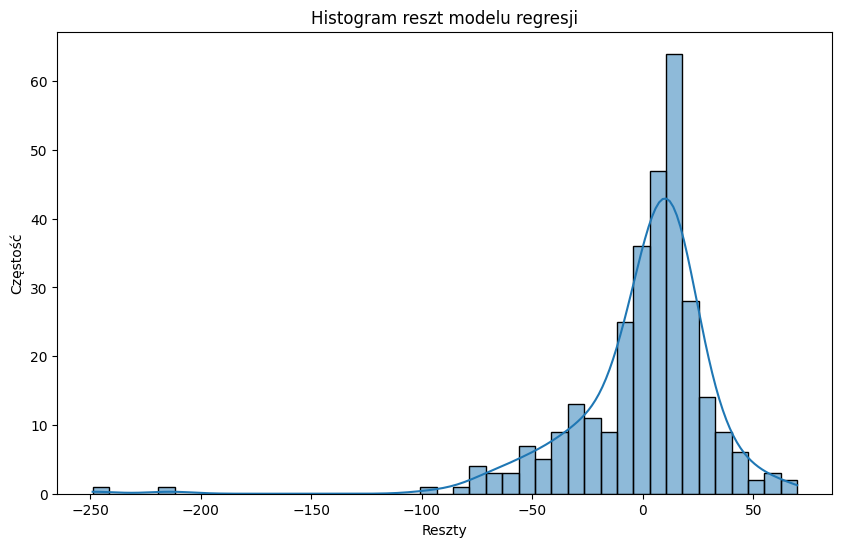

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(results.resid, kde=True)
plt.title('Histogram reszt modelu regresji')
plt.xlabel('Reszty')
plt.ylabel('Częstość')
plt.show()

Jakieś obserwacje definitywnie odstają po stronie lewej wykresu, przyjrzyjmy im się bliżej.

In [ ]:
quantiles = results.resid.quantile([0.01, 0.99])

extreme_residuals_low = results.resid[results.resid < quantiles[0.01]]

extreme_residual_indices = extreme_residuals_low.index

extreme_residual_data = df.loc[extreme_residual_indices]
extreme_residual_data, extreme_residuals_low

(      id   waga  wzrost  dzieci  wiek   dochod  oszczednosci  wydatki_zyw  \
 115  300  78.18  167.66       0    65  3632.65       2463.14       216.29   
 159  236  81.10  178.87       3    56  1617.44       1569.45        56.27   
 236  304  79.18  175.14       1    52  4780.15       3390.59       124.69   
 289  303  85.08  175.06       1    52  4339.20       2921.25       110.60   
 
      plec_2  jednoos_1  miejsce_2  miejsce_3  
 115       0          1          1          0  
 159       1          1          1          0  
 236       0          1          1          0  
 289       1          1          1          0  ,
 115    -95.923711
 159    -84.631083
 236   -213.687914
 289   -248.847153
 dtype: float64)

Dane te nie wyglądają na błędne, więc nie zamierzam ich usuwać.

Spróbuję poeksperymentować z transformacjami zmiennych, które mogą poprawić liniowość i homoskedastyczność modelu. Rozpocznę od zastosowania transformacji logarytmicznej do zmiennych dochod i oszczednosci (z przesunieciem), które wykazały wysoki współczynnik VIF oraz przeprowadzimy testy na nowo utworzonym modelu.


Po wytrenowaniu modelu bez zmiennej dochod, sprawdzę czy problem współliniowości zanikł.

Wartości VIF dla wszystkich zmiennych są niskie, z czego wynika, że naprawiliśmy problem współliniowości.

In [ ]:
X_orig['dochod_log'] = np.log(df['dochod'])
shift_const = abs(df['oszczednosci'].min()) + 1
X_orig['log_oszczednosci'] = np.log(X_orig['oszczednosci'] + shift_const)

X = X_orig.drop(columns=['dochod', 'oszczednosci'])


X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     12.87
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.27e-18
Time:                        03:31:56   Log-Likelihood:                -1605.8
No. Observations:                 304   AIC:                             3234.
Df Residuals:                     293   BIC:                             3275.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               64.3294    160.493      0.401      0.689    -251.536     380.195
waga                -0.9140      1.110     -0.824      0.411      -3.099       1.270
wzrost              -0.5609      0.603     -0.931      0.353      -1.747       0.625
dzieci               2.7723      2.107      1.316      0.189      -1.375       6.920
wiek                 0.1467      0.451      0.325      0.745      -0.742       1.035
plec_2              24.0855      8.988      2.680      0.008       6.396      41.774
jednoos_1          -40.3448      9.419     -4.283      0.000     -58.883     -21.807
miejsce_2           -1.2986      6.845     -0.190      0.850     -14.771      12.173
miejsce_3           10.4765      7.610      1.377      0.170      -4.500      25.454
dochod_log          93.2485     14.651      6.365      0.000      64.415     122.082
log_oszczednosci   -49.6247      5.637     -8.803      0.000     -60.720     -38.530
==============================================================================
Omnibus:                       76.559   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.716
Skew:                          -1.294   Prob(JB):                     2.53e-34
Kurtosis:                       5.348   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             Feature          VIF
0              const  3327.389247
1               waga     1.731165
2             wzrost     2.249792
3             dzieci     1.028373
4               wiek     1.207322
5             plec_2     2.595173
6          jednoos_1     2.787722
7          miejsce_2     1.500384
8          miejsce_3     1.484815
9         dochod_log     4.155300
10  log_oszczednosci     2.588926


Wartości VIF dla zmiennych dochod i oszczednosci zdecydowanie spadły, zażegnaliśmy problem współliniowości.

Spójrzmy na wykres reszt.

Text(0, 0.5, 'Residuals')

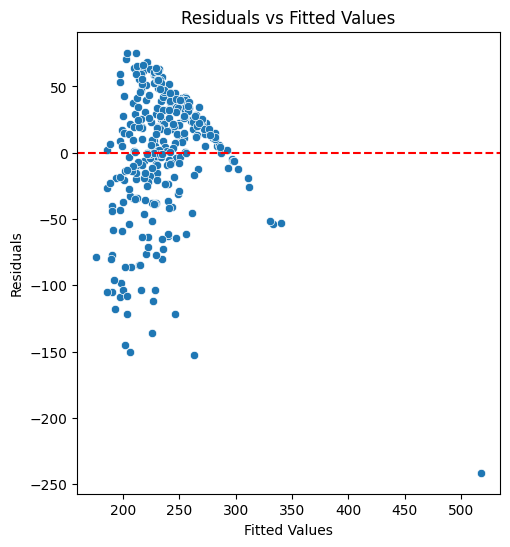

In [ ]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Wciąż widać znaczną heteroskadystyczność.

In [ ]:
quantiles = results.resid.quantile([0.01, 0.99])

extreme_residuals_low = results.resid[results.resid < quantiles[0.01]]

extreme_residual_indices = extreme_residuals_low.index

extreme_residual_data = df.loc[extreme_residual_indices]
extreme_residual_data, extreme_residuals_low

(      id   waga  wzrost  dzieci  wiek   dochod  oszczednosci  wydatki_zyw  \
 64   259  86.57  175.83       1    64  1712.88       1659.56        56.52   
 159  236  81.10  178.87       3    56  1617.44       1569.45        56.27   
 194   11  79.09  173.51       0    67   726.79       -204.24       276.31   
 289  303  85.08  175.06       1    52  4339.20       2921.25       110.60   
 
      plec_2  jednoos_1  miejsce_2  miejsce_3  
 64        1          1          1          0  
 159       1          1          1          0  
 194       0          0          1          0  
 289       1          1          1          0  ,
 64    -145.262175
 159   -150.289117
 194   -241.315934
 289   -152.246953
 dtype: float64)

In [ ]:
df_clean = df.loc[df['oszczednosci'] > -204.24]
X_orig = df_clean.drop(columns=['id', 'wydatki_zyw'])
X_orig.drop(columns=['dochod', 'oszczednosci'], inplace=True)

y = df_clean['wydatki_zyw']

X_orig['dochod_log'] = np.log(df_clean['dochod'])
shift_const = abs(df_clean['oszczednosci'].min()) + 1
X_orig['log_oszczednosci'] = np.log(df_clean['oszczednosci'] + shift_const)

X = X_orig

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     12.65
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.74e-18
Time:                        03:31:56   Log-Likelihood:                -1601.4
No. Observations:                 303   AIC:                             3225.
Df Residuals:                     292   BIC:                             3266.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.6376    162.051     -0.029      0.977    -323.573     314.298
waga                -0.5641      1.114     -0.506      0.613      -2.756       1.628
wzrost              -0.5197      0.605     -0.858      0.391      -1.711       0.672
dzieci               1.8769      2.121      0.885      0.377      -2.297       6.050
wiek                 0.4166      0.453      0.920      0.358      -0.475       1.308
plec_2              22.9581      9.043      2.539      0.012       5.160      40.757
jednoos_1          -40.7478      9.448     -4.313      0.000     -59.343     -22.152
miejsce_2           -0.4932      6.869     -0.072      0.943     -14.012      13.025
miejsce_3           10.5300      7.633      1.380      0.169      -4.493      25.553
dochod_log          90.7845     14.563      6.234      0.000      62.123     119.446
log_oszczednosci   -44.4521      5.118     -8.685      0.000     -54.525     -34.379
==============================================================================
Omnibus:                       62.967   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.543
Skew:                          -1.193   Prob(JB):                     3.28e-23
Kurtosis:                       4.585   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

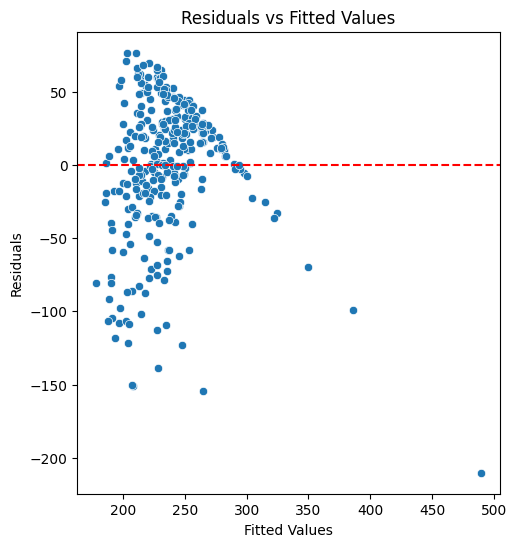

In [ ]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

### Ilościowa interpretacja zmiennych plec_2 i log_oszczednosci

**plec_2**:

Współczynnik: 22.9581
Interpretacja: Współczynnik dla zmiennej plec_2, która oznacza mężczyzn w porównaniu do kobiet, wynosi 22.9581. Oznacza to, że przy założeniu niezmienności innych zmiennych w modelu, mężczyźni wydają średnio o około 22.96 zł więcej na żywność niż kobiety. Jest to pozytywna różnica, co może sugerować, że mężczyźni mają tendencję do wyższych wydatków na żywność w tej analizowanej grupie.

**log_oszczednosci**:

Współczynnik: -44.4521
Interpretacja: Współczynnik dla zlogarytmowanych oszczędności wynosi -44.4521, co oznacza, że wzrost zlogarytmowanych oszczędności o jednostkę skutkuje średnim spadkiem wydatków na żywność o około 44.45 zł. Interpretując ten efekt, możemy przypuszczać, że większe oszczędności (po zlogarytmowaniu) są skorelowane z większą skłonnością do oszczędzania również na codziennych wydatkach, takich jak żywność.

### Charakterystyki opisowe osób, które cechują wydatki na żywność należące do górnych 10% predykcji wydatków na żywność


In [ ]:
predicted_expenses = results.predict(X)

X_with_predictions = X.copy()
X_with_predictions['predicted_wydatki_zyw'] = predicted_expenses

X_with_predictions_sorted = X_with_predictions.sort_values(by='predicted_wydatki_zyw', ascending=False)
top_10_percent = X_with_predictions_sorted.head(int(len(X_with_predictions_sorted) * 0.1))

top_10_percent.describe(include='all')

,const,waga,wzrost,dzieci,wiek,plec_2,jednoos_1,miejsce_2,miejsce_3,dochod_log,log_oszczednosci,predicted_wydatki_zyw
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.0,80.139667,173.093333,2.566667,58.066667,0.566667,0.0,0.333333,0.500000,6.798896,5.088967,298.342023
std,0.0,2.892813,6.876286,1.330889,6.119124,0.504007,0.0,0.479463,0.508548,0.146527,1.296921,44.601883
min,1.0,74.460000,159.970000,0.000000,46.000000,0.000000,0.0,0.000000,0.000000,6.545852,0.000000,266.024123
25%,1.0,77.595000,167.482500,1.250000,54.250000,0.000000,0.0,0.000000,0.000000,6.677396,4.846853,276.528264
50%,1.0,80.350000,174.055000,3.000000,56.500000,1.000000,0.0,0.000000,0.500000,6.778140,5.299195,282.293749
75%,1.0,82.040000,177.440000,3.750000,62.750000,1.000000,0.0,1.000000,1.000000,6.902763,5.906968,299.637663
max,1.0,85.360000,184.690000,5.000000,74.000000,1.000000,0.0,1.000000,1.000000,7.055736,6.426440,489.516779


**Charakterystyki Demograficzne:**

**Waga**: Średnia waga tych osób to około 80.14 kg, z małym zakresem wahania (std = 2.89), co wskazuje na relatywnie jednorodność wagi w tej grupie.

**Wzrost**:
Średni wzrost wynosi 173.09 cm, z nieco większym zróżnicowaniem (std = 6.88), co sugeruje większą różnorodność wzrostu wśród tych osób.

**Dzieci**:
Średnio osoby te mają około 2.57 dzieci. Zakres od 0 do 5 dzieci wskazuje na różnorodność rodzinne w tej grupie.

**Wiek**:
Średni wiek wynosi 58.07 lat, co może wskazywać na to, że są to osoby w starszym wieku, z dość szerokim zakresem wieku (min = 46, max = 74).

**Płeć** (plec_2):
Około 56.7% to mężczyźni, co sugeruje niewielką przewagę mężczyzn w tej grupie wyższych wydatków na żywność.

**Status gospodarstwa domowego** (jednoos_1):
Wszystkie osoby w tej grupie (100%) należą do gospodarstw wieloosobowych, co może wskazywać na większe wydatki związane z utrzymaniem rodziny.

**Wielkość miejscowości** (miejsce_2, miejsce_3):
Około 33.3% mieszka w miejscowościach o ludności od 10 do 100 tyś., a 50% w miejscowościach o ludności powyżej 100 tyś, co pokazuje różnorodność w zakresie miejsca zamieszkania.

**Charakterystyki Ekonomiczne:**

**Logarytmicznie przekształcony dochód** (dochod_log):
Średnia wartość przekształconego dochodu to 6.80, z niewielkimi wahnięciami, co wskazuje na stosunkowo wysoki i stabilny poziom dochodów w tej grupie.

**Logarytmicznie przekształcone oszczędności** (log_oszczednosci):
Średnia wartość wynosi 5.09 z dość dużym zakresem (min = 0, max = 6.43), co sugeruje znaczną różnorodność w poziomie oszczędności.

**Interpretacja:**
Osoby z najwyższymi wydatkami na żywność w Twoim modelu są zróżnicowane pod względem demograficznym, ale cechuje je wyższy poziom dochodów. Wysoka wartość przewidywanych wydatków może wynikać z bardziej zamożnego stylu życia oraz z obecności rodziny, co zwiększa konsumpcję żywności. Różnorodność w miejscu zamieszkania może także wpływać na dostępność i preferencje konsumpcyjne.